C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


0.9330801539945041
[1.69071605 0.98799465]
5.193332447981567
Prediction for [5 5] is 18.586885920892914


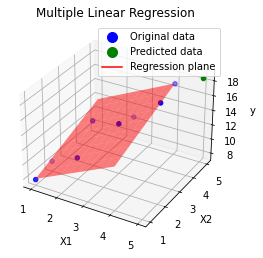

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Set a random seed for reproducibility
np.random.seed(0)

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [3, 3], [3, 4], [4, 4], [4, 5]])
# y = 1 * x_0 + 2 * x_1 + 3 + noise
y = np.dot(X, np.array([1, 2])) + 3 + np.random.normal(0, 1, len(X))
reg = LinearRegression().fit(X, y)

print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

# Predicting for a new data point
new_point = np.array([[5, 5]])
prediction = reg.predict(new_point)
print(f'Prediction for {new_point[0]} is {prediction[0]}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the original data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue')

# Plotting the predicted data point
ax.scatter(new_point[:, 0], new_point[:, 1], prediction, color='green')

# Creating a mesh of x and y values to plot the regression plane
x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), num=10)
y_range = np.linspace(min(X[:, 1]), max(X[:, 1]), num=10)
x_range, y_range = np.meshgrid(x_range, y_range)
z = reg.coef_[0]*x_range + reg.coef_[1]*y_range + reg.intercept_

# Plotting the regression plane
ax.plot_surface(x_range, y_range, z, color='red', alpha=0.5)

# Creating proxy artists for legend
blue_patch = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Original data')
green_patch = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=10, label='Predicted data')
red_patch = mlines.Line2D([], [], color='red', markersize=10, label='Regression plane')

ax.set_title('Multiple Linear Regression')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.legend(handles=[blue_patch, green_patch, red_patch])
plt.show()